In [83]:
import pandas as pd 
import numpy as np
from processador_ibovespa import ProcessadorIbovespa
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [84]:
caminho_arquivo = "../../dados/investimento/ibovespa_historico.csv"

df = pd.read_csv(caminho_arquivo, sep = ';')

In [85]:
df.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,31.10.2023,113.144,112.534,113.597,112.098,"10,56M","0,54%"
1,31.10.2022,116.037,114.533,116.763,112.113,"21,64M","1,31%"
2,31.10.2019,107.220,108.403,108.403,106.356,"5,38M","-1,10%"
3,31.10.2018,87.424,86.889,88.028,86.213,"6,07M","0,62%"
4,31.10.2017,74.308,74.798,75.142,74.145,"3,66M","-0,66%"


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5714 entries, 0 to 5713
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      5714 non-null   object 
 1   Último    5714 non-null   float64
 2   Abertura  5714 non-null   float64
 3   Máxima    5714 non-null   float64
 4   Mínima    5714 non-null   float64
 5   Vol.      5713 non-null   object 
 6   Var%      5714 non-null   object 
dtypes: float64(4), object(3)
memory usage: 312.6+ KB


In [87]:
# Criando o índice a partir da coluna de data

df.index = pd.to_datetime(df.Data, format = "%d.%m.%Y")

In [88]:
df.drop(columns=['Data'], inplace=True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5714 entries, 2023-10-31 to 2001-02-01
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    5714 non-null   float64
 1   Abertura  5714 non-null   float64
 2   Máxima    5714 non-null   float64
 3   Mínima    5714 non-null   float64
 4   Vol.      5713 non-null   object 
 5   Var%      5714 non-null   object 
dtypes: float64(4), object(2)
memory usage: 312.5+ KB


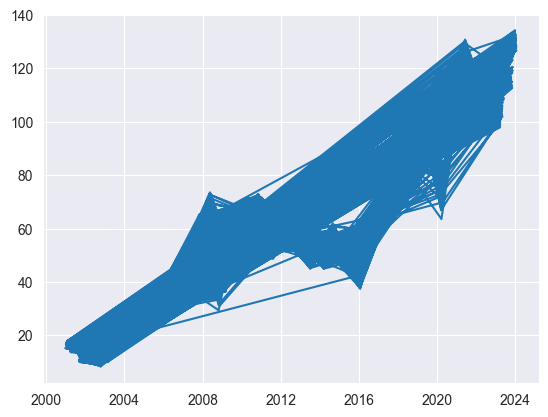

In [90]:
plt.plot(df.index,df.Último)

In [91]:
# Selecionando apenas a coluna Último do df

df_indice = df[['Último']]
df_indice.rename(columns={'Último':'fechamento'}, inplace=True)

C:\Users\Sergio Velloso\AppData\Local\Temp\ipykernel_7804\3962309895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indice.rename(columns={'Último':'fechamento'}, inplace=True)


In [92]:
df_indice.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5714 entries, 2023-10-31 to 2001-02-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   fechamento  5714 non-null   float64
dtypes: float64(1)
memory usage: 89.3 KB


In [93]:
df_indice = df_indice.asfreq('D').interpolate(method='linear')
#df_indice = df_indice.asfreq('D').fillna(method='ffill')


In [94]:
df_indice.head()

,fechamento
Data,
2000-12-27,15.1860
2000-12-28,15.2590
2000-12-29,15.2922
2000-12-30,15.3254
2000-12-31,15.3586


In [95]:
resultados = seasonal_decompose(df_indice)

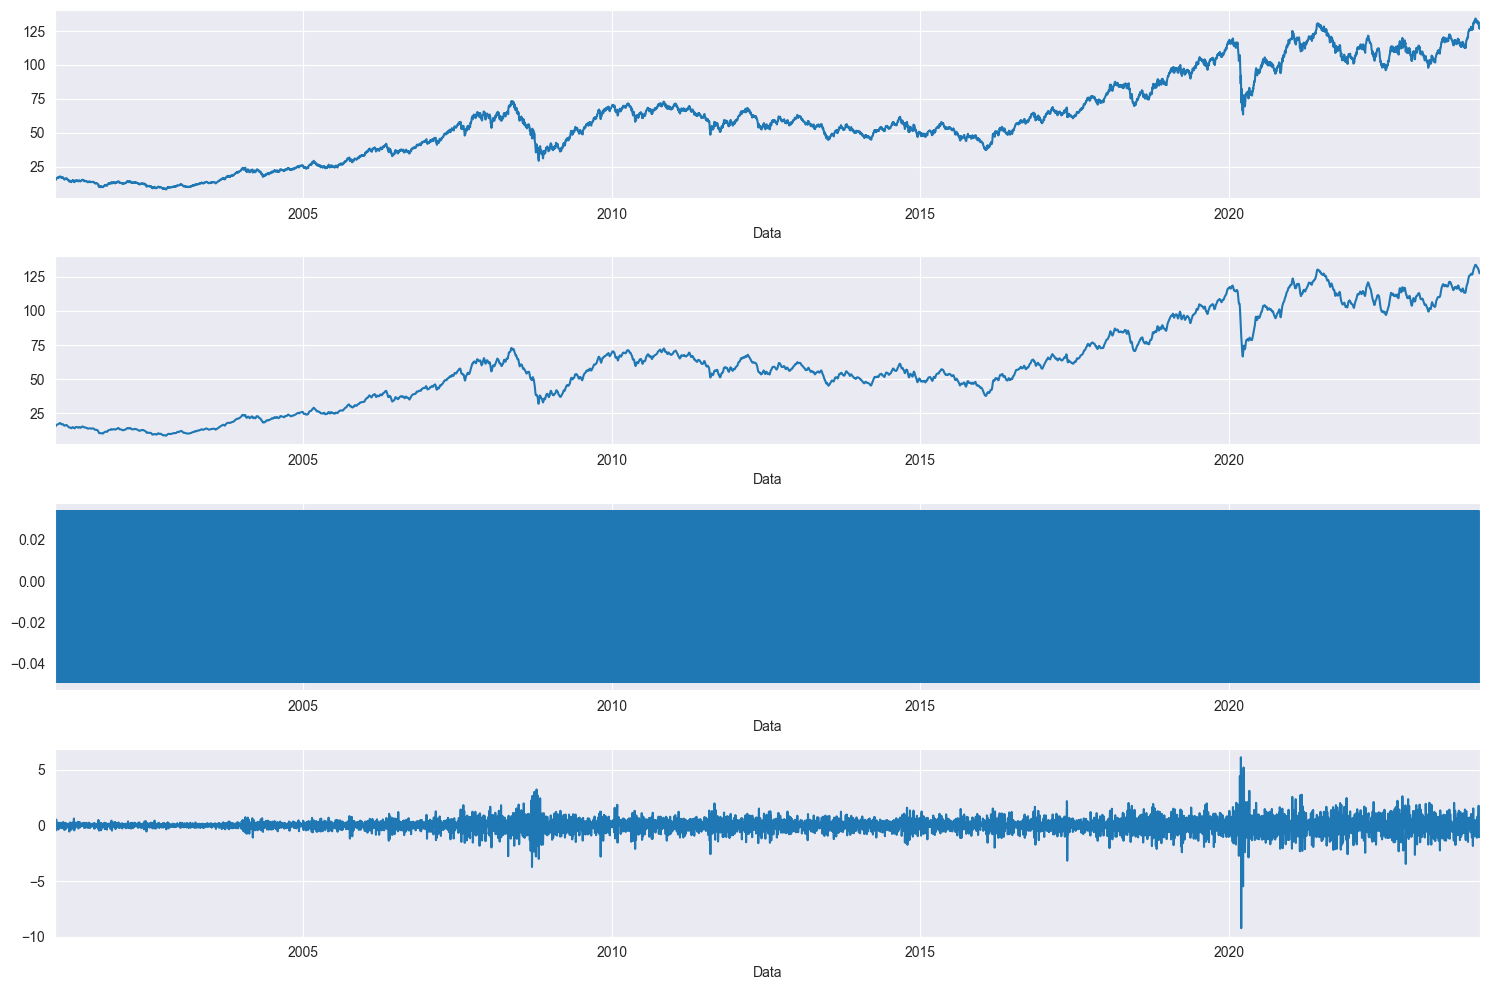

In [96]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize= (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)


plt.tight_layout()

In [97]:
# Verificando se existe estacionaridade

X = df_indice.fechamento.values
result = adfuller(X)

print('Teste ADF')
print(f'Teste Estatístico: {result[0]}')
print(f'P-Value: {result[1]}')
print('Valores críticos:')

for key, value in result[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -0.7250990534259051
P-Value: 0.8401407693003322
Valores críticos:
	1%: -3.431127799890638
	5%: -2.861883734127751
	10%: -2.566952964804653


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

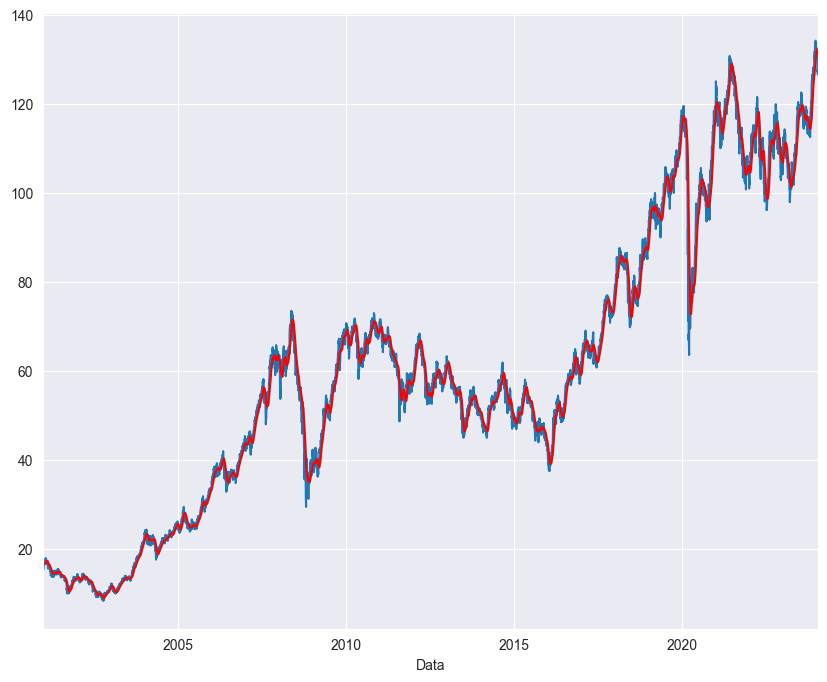

In [98]:
# Cálculo da média móvel para facilitar a visualização da tendência

ma = df_indice.rolling(30).mean()

f, ax = plt.subplots(figsize=(10,8))
df_indice.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r') 
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

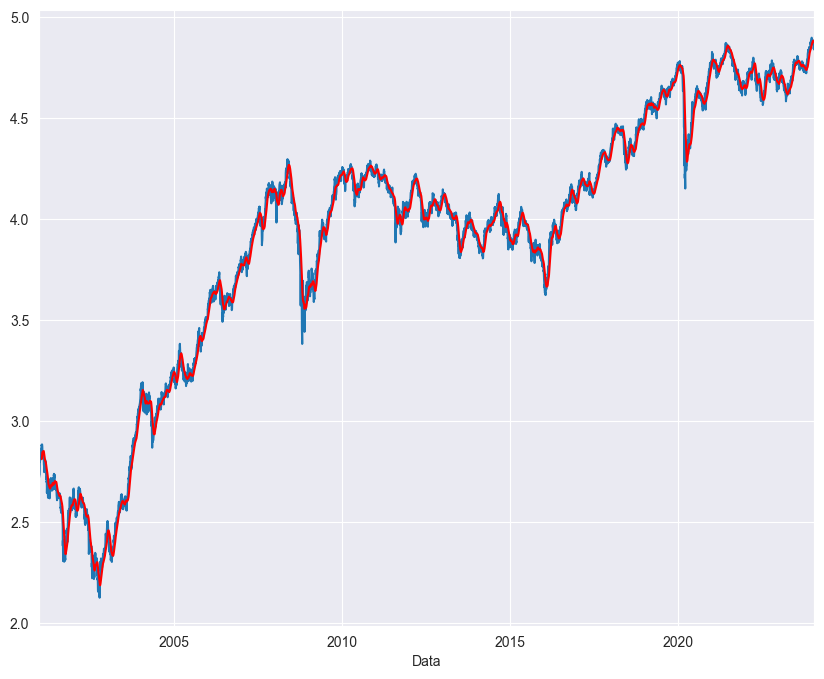

In [99]:
# Diferenciando buscando a estacionariedade

# Aplicando logaritimo

df_indice_log = np.log(df_indice)
ma_log = df_indice_log.rolling(30).mean()


f, ax = plt.subplots(figsize=(10,8))
df_indice_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r') 
plt.tight_layout


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

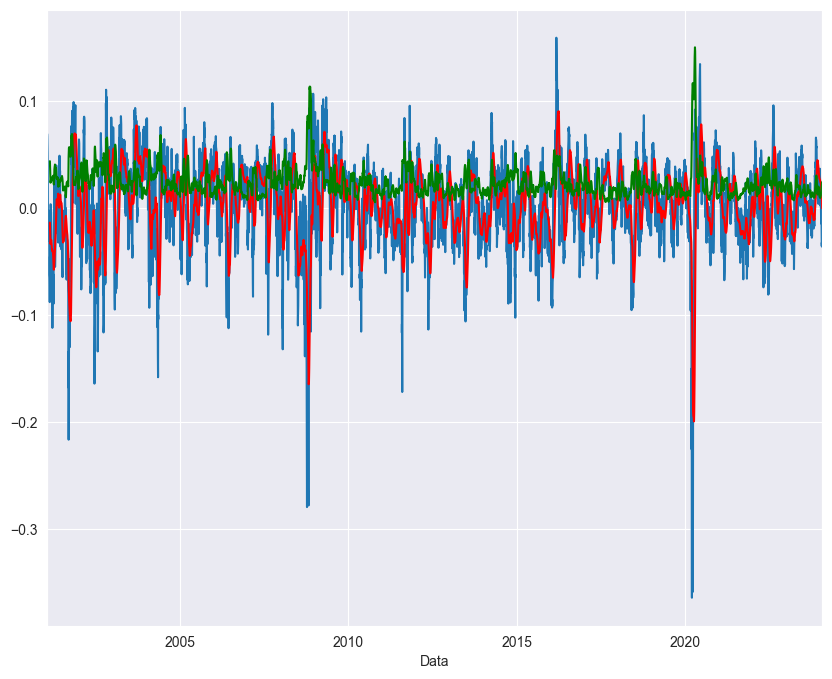

In [100]:
# Aplicando logaritimo e subtraindo a média móvel

df_s = (df_indice_log - ma_log).dropna()

ma_s = df_s.rolling(30).mean()

std = df_s.rolling(30).std()

f, ax = plt.subplots(figsize=(10,8))
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r') 
std.plot(ax=ax, legend=False, color='g') 
plt.tight_layout

In [101]:
# Verificando novamente o teste de ADF

X_s = df_s.fechamento.values
result_s = adfuller(X_s)

print('Teste ADF')
print(f'Teste Estatístico: {result_s[0]}')
print(f'P-Value: {result_s[1]}')
print('Valores críticos:')

for key, value in result_s[4].items():
    print(f'\t{key}: {value}')

Teste ADF
Teste Estatístico: -12.645374677960675
P-Value: 1.4055122798630035e-23
Valores críticos:
	1%: -3.4311314247270106
	5%: -2.8618853358458023
	10%: -2.5669538174128843


Teste ADF
Teste Estatístico: -22.722710602748034
P-Value: 0.0
Valores críticos:
	1%: -3.431131985395069
	5%: -2.861885583589818
	10%: -2.5669539492891746


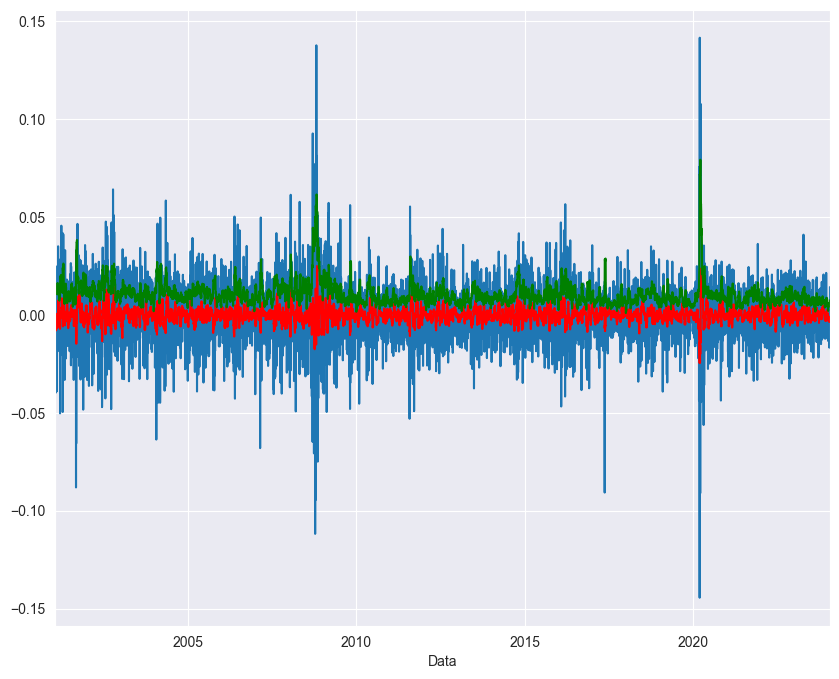

In [115]:
# Diferenciando

df_diff = df_s.diff(1).dropna()
ma_diff = df_diff.rolling(12).mean()
std_diff = df_diff.rolling(12).std()

f, ax = plt.subplots(figsize=(10,8))
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r') 
std_diff.plot(ax=ax, legend=False, color='g') 
plt.tight_layout

X_diff = df_diff.fechamento.values
result_diff = adfuller(X_diff)

print('Teste ADF')
print(f'Teste Estatístico: {result_diff[0]}')
print(f'P-Value: {result_diff[1]}')
print('Valores críticos:')

for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')


In [127]:
# Verificando o ACF e PACF

lag_acf = acf(df_diff.dropna(), nlags=365)
lag_pacf = pacf(df_diff.dropna(), nlags=365)


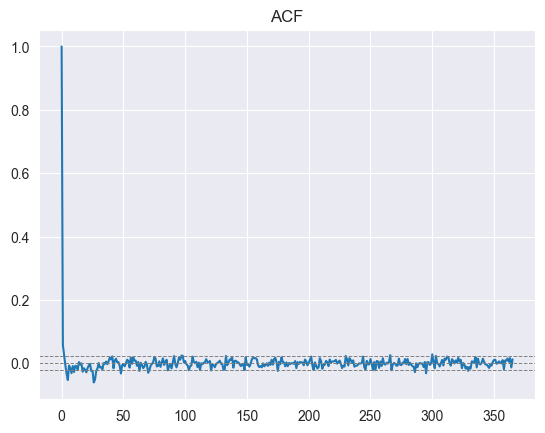

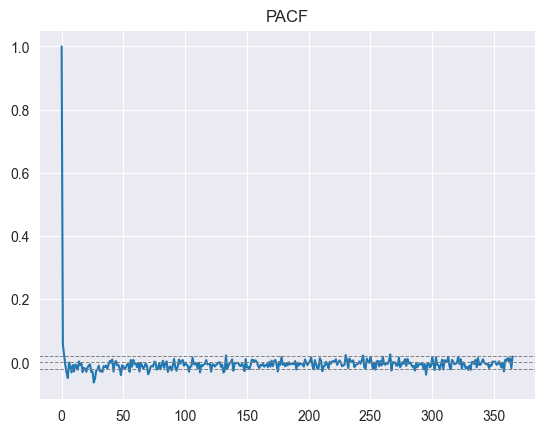

In [128]:
#Tolerância de 5% ACF
#1.96/sqrt(N-d) -> N: Número de Pontos do df e  d: é o número de vezes que nós diferenciamos o dataframe.

plt.plot(lag_acf)

plt.axhline(y = -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth = '.7')
plt.axhline(y = 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y = -1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)
plt.axhline(y = 0, linestyle='--', color='gray', linewidth = '.7')
plt.axhline(y = 1.96/(np.sqrt((len(df_diff) - 1))), linestyle='--', color='gray', linewidth = 0.7)

plt.title("PACF")
plt.show()


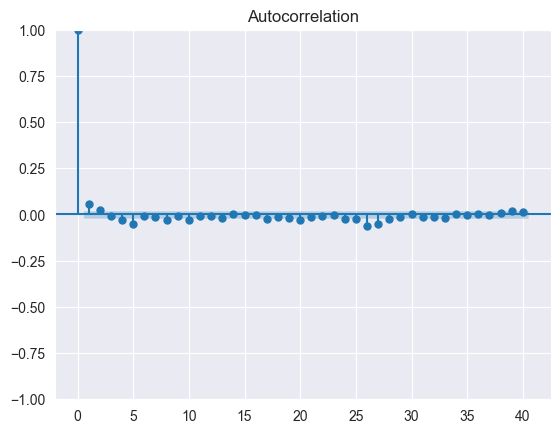

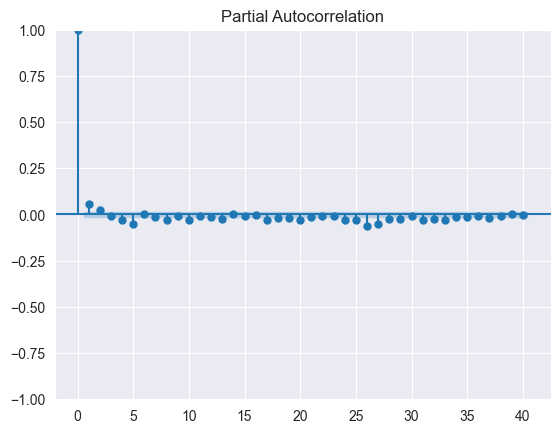

In [129]:
plot_acf(df_diff.fechamento)
plot_pacf(df_diff.fechamento)

plt.show()

In [130]:
df_fechamento = df_indice.reset_index()
df_fechamento.rename(columns={'Data':'ds', 'fechamento':'y'}, inplace=True)

df_fechamento

,ds,y
0,2000-12-27,15.186000
1,2000-12-28,15.259000
2,2000-12-29,15.292200
3,2000-12-30,15.325400
4,2000-12-31,15.358600
...,...,...
8423,2024-01-19,127.636000
8424,2024-01-20,127.291333
8425,2024-01-21,126.946667
8426,2024-01-22,126.602000


In [111]:
treino = df_fechamento.loc[df_fechamento['ds'] < '2023-10-26']
valid = df_fechamento.loc[df_fechamento['ds'] >= '2023-10-26']

